In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [2]:
# Number of Layers
x_data = np.linspace(1, 10, 10) 
# Critical Temperature
y_data = [2.256, 3.462,4.116,4.090,4.166,4.342,4.351, 4.51, 4.51, 4.51] 

In [3]:
""" Test Equations """
def func_power(x, a, b):
    return a * np.power(x,b)

def func_log(x, a, b, c):
    return a * np.log(b*x) + c

def func_logistics(x, a, b):
    return 4.51/(1 + (a*np.exp(-b*x)))

def func_arctan(x, a, b, c):
    return np.where(x > 0, a*np.arctan(b*x) + c, np.nan)

def func_hyptan(x, a, b):
    return np.where(x > 0, a*np.tanh(b*x), np.nan)

def func_2poly(x, a, b, c):
    return a*np.power(x,2) + b*x + c

def func_3poly(x, a, b, c, d):
    return a*np.power(x,3) + b*np.power(x,2) + c*x + d

In [4]:
popt, pcov = curve_fit(func_hyptan, x_data, y_data)
opt_a, opt_b = popt
y_model = func_hyptan(x_data, opt_a, opt_b)
r_squared = r2_score(y_data, y_model)

Plot Curve Fit

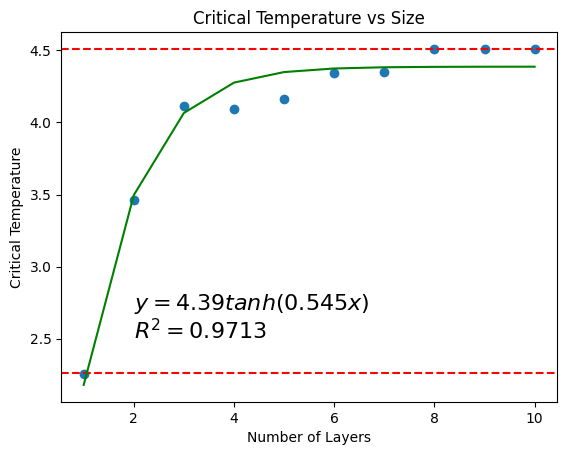

In [6]:
plt.figure()
plt.axhline(4.51, linestyle = '--', color = 'r')
plt.axhline(2.26, linestyle = '--', color = 'r')
plt.scatter(x_data, y_data)
plt.plot(x_data, y_model, color = 'g')

# Annotate Data
equation = f"$y = {opt_a:.3}tanh({opt_b:.3}x)$"
r_text = f"$R^2 = {r_squared:.4f}$"
plt.text(2,2.7, equation, fontsize=16)
plt.text(2,2.5, r_text, fontsize=16)

plt.title("Critical Temperature vs Size")
plt.xlabel("Number of Layers")
plt.ylabel("Critical Temperature")
plt.savefig(f"Critical Temperature vs Size, Hyptan {len(x_data)}")
plt.show()

Optimal Parameter Error

In [8]:
err_a, err_b = np.sqrt(np.diag(pcov))
print(f"Optimal Parameters \n a: {opt_a:.3f}+/-{err_a:.3f} \n b: {opt_b:.3f}+/-{err_b:.3f} ")

Optimal Parameters 
 a: 4.387+/-0.049 
 b: 0.545+/-0.029 
